In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
DIR = './processed/'

In [2]:
# Load CMIP SI edges and define best models (from other script)
dfj=pd.read_csv(DIR+'CMIP6-26_SIedge_Jan_1930_1939.csv',index_col=0)
dff=pd.read_csv(DIR+'CMIP6-26_SIedge_Feb_1930_1939.csv',index_col=0)
dfn=pd.read_csv(DIR+'CMIP6-26_SIedge_Nov_1930_1939.csv',index_col=0)
dfd=pd.read_csv(DIR+'CMIP6-26_SIedge_Dec_1930_1939.csv',index_col=0)

best8 = ['FIO-ESM-2-0',
 'IPSL-CM6A-LR-INCA',
 'TaiESM1',
 'IPSL-CM6A-LR',
 'CMCC-CM2-HR4',
 'ACCESS-ESM1-5',
 'GFDL-ESM4',
 'CanESM5']

In [3]:
# Load whale catches and group them according to longitudinal bands
df = pd.read_csv('hump_filled_RR.csv', sep= ';')
df = df[df['lat'] <= -40]
#%% Decades Chosen
Decade1930 = df[(df['year'] >= 1930) & (df['year'] < 1940)]
## Create 10 deg longitudinal group labels
labels = ['{0} - {1}'.format(i, i + 9) for i in range(-179, 180, 10)]

def get_group(df, name, obj=None, default=None) :
    # extract a group from a dataframe given a categorical name
    if obj is None :
        obj = df.obj
    try :
        inds = df.indices[name]
    except KeyError:
        if default is None :
            raise
        inds = default
    return df.obj.take(inds, df.axis)

def month_groups(decade,month,labels):
    # create latitudinal groups for a given month
    sel = decade[decade['month']==month]
    sel = sel[sel['class'] <7]
    sel['group'] = pd.cut(sel['long'], range(-179, 185, 10), right=False, labels=labels)
    groups = sel.groupby('group')
    return groups

dict_groups = {'-179\n-170':[],'-169\n-160':[],'-159\n-150':[],'-149\n-140':[],'-139\n-130':[],'-129\n-120':[],'-119\n-110':[],
         '-109\n-100':[],'-99\n-90':[],'-89\n-80':[],'-79\n-70':[],'-69\n-60':[],'-59\n-50':[],'-49\n-40':[],'-39\n-30':[],
          '-29\n-20':[],'-19\n-10':[],'-9\n0':[],'1\n10':[],'11\n20':[],'21\n30':[],'31\n40':[],'41\n50':[],'51\n60':[],
          '61\n70':[],'71\n80':[],'81\n90':[],'91\n100':[],'101\n110':[],'111\n120':[],'121\n30':[],'131\n140':[],'141\n150':[],
          '151\n160':[],'161\n170':[],'171\n180':[]}

In [4]:
#%% NOVEMBER
groupm = month_groups(Decade1930,11,labels)
# create lists of arrays of latitudinal positions and catches, each one for every 10 degrees bin
LN = [] # latitudes
NN = [] # number of whale catches
for l in labels:
    group = get_group(groupm, l, default = None)
    LN.append(group['lat'].values)
    NN.append(str(sum(group['hbk'])))

#%% DECEMBER
groupm = month_groups(Decade1930,12,labels)
# create lists of arrays of latitudinal positions and catches, each one for every 10 degrees bin
LD = [] # latitudes
ND = [] # number of whale catches
for l in labels:
    group = get_group(groupm, l, default = None)
    LD.append(group['lat'].values)
    ND.append(str(sum(group['hbk'])))

#%% JANUARY
groupm = month_groups(Decade1930,1,labels)
# create lists of arrays of latitudinal positions and catches, each one for every 10 degrees bin
LJ = [] # latitudes
NJ = [] # number of whale catches
for l in labels:
    group = get_group(groupm, l, default = None)
    LJ.append(group['lat'].values)
    NJ.append(str(sum(group['hbk'])))

#%% FEBRUARY
groupm = month_groups(Decade1930,2,labels)
# create lists of arrays of latitudinal positions and catches, each one for every 10 degrees bin
LF = [] # latitudes
NF = [] # number of whale catches
for l in labels:
    group = get_group(groupm, l, default = None)
    LF.append(group['lat'].values)
    NF.append(str(sum(group['hbk'])))

/tmp/ipykernel_7383/2308417710.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = sel.groupby('group')
/tmp/ipykernel_7383/2308417710.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = sel.groupby('group')
/tmp/ipykernel_7383/2308417710.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = sel.groupby('group')
/tmp/ipykernel_7383/2308417710.py:26: FutureWarning: The default of observed=False

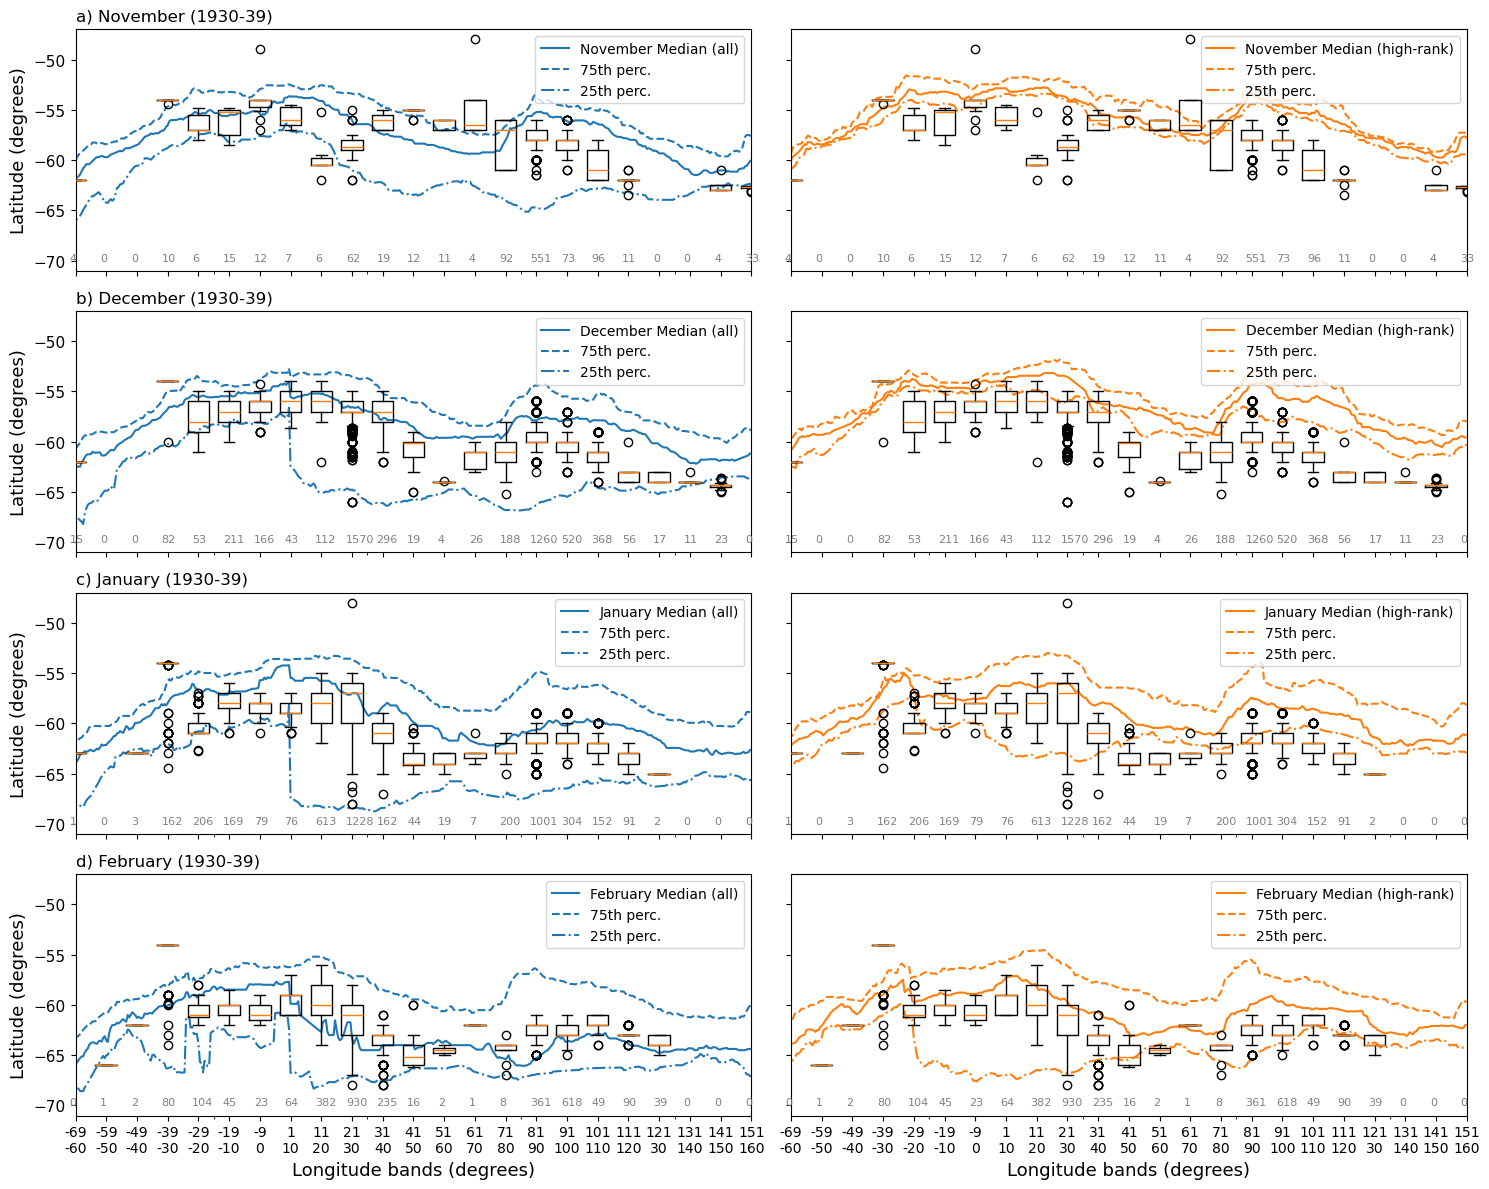

In [10]:
fig, axs = plt.subplots(4, 2, figsize=(15,12), sharey=True, sharex = True, tight_layout=True )
plt.subplots_adjust
x = np.arange(-180,180,10)
OS = 2
FS = 8
LAT = -70

##################### all models column
ax = axs[0,0]
M = dfn.median(axis=1)
p75 = dfn.quantile(0.75,axis=1)
p25 = dfn.quantile(0.25,axis=1)
M.plot(ax=ax,label='November Median (all)')
p75.plot(ax=ax,color='C0',linestyle='--',label='75th perc.')
p25.plot(ax=ax,color='C0',linestyle='-.',label='25th perc.')
out = ax.boxplot(LN,widths = 7, positions = range(-180,180,10), zorder=10)
ax.legend(loc='upper right')
for i in range(11,34):
    ax.text(x[i]-OS,LAT,NN[i],color='grey',fontsize=FS)

ax = axs[1,0]
M = dfd.median(axis=1)
p75 = dfd.quantile(0.75,axis=1)
p25 = dfd.quantile(0.25,axis=1)
M.plot(ax=ax,label='December Median (all)')
p75.plot(ax=ax,color='C0',linestyle='--',label='75th perc.')
p25.plot(ax=ax,color='C0',linestyle='-.',label='25th perc.')
out = ax.boxplot(LD,widths = 7, positions = range(-180,180,10), zorder=10)
ax.legend(loc='upper right')
for i in range(11,34):
    ax.text(x[i]-OS,LAT,ND[i],color='grey',fontsize=FS)

ax = axs[2,0]
M = dfj.median(axis=1)
p75 = dfj.quantile(0.75,axis=1)
p25 = dfj.quantile(0.25,axis=1)
M.plot(ax=ax,label='January Median (all)')
p75.plot(ax=ax,color='C0',linestyle='--',label='75th perc.')
p25.plot(ax=ax,color='C0',linestyle='-.',label='25th perc.')
out = ax.boxplot(LJ,widths = 7, positions = range(-180,180,10), zorder=10)
ax.legend(loc='upper right')
for i in range(11,34):
    ax.text(x[i]-OS,LAT,NJ[i],color='grey',fontsize=FS)

ax = axs[3,0]
M = dff.median(axis=1)
p75 = dff.quantile(0.75,axis=1)
p25 = dff.quantile(0.25,axis=1)
M.plot(ax=ax,label='February Median (all)')
p75.plot(ax=ax,color='C0',linestyle='--',label='75th perc.')
p25.plot(ax=ax,color='C0',linestyle='-.',label='25th perc.')
out = ax.boxplot(LF,widths = 7, positions = range(-180,180,10), zorder=10)
ax.legend(loc='upper right')
for i in range(11,34):
    ax.text(x[i]-OS,LAT,NF[i],color='grey',fontsize=FS)

##################### best models column
ax = axs[0,1]
M = dfn[best8].median(axis=1)
p75 = dfn[best8].quantile(0.75,axis=1)
p25 = dfn[best8].quantile(0.25,axis=1)
M.plot(ax=ax,color='C1',label='November Median (high-rank)')
p75.plot(ax=ax,color='C1',linestyle='--',label='75th perc.')
p25.plot(ax=ax,color='C1',linestyle='-.',label='25th perc.')
out = ax.boxplot(LN,widths = 7, positions = range(-180,180,10), zorder=10)
ax.legend(loc='upper right')
for i in range(11,34):
    ax.text(x[i]-OS,LAT,NN[i],color='grey',fontsize=FS)

ax = axs[1,1]
M = dfd[best8].median(axis=1)
p75 = dfd[best8].quantile(0.75,axis=1)
p25 = dfd[best8].quantile(0.25,axis=1)
M.plot(ax=ax,color='C1',label='December Median (high-rank)')
p75.plot(ax=ax,color='C1',linestyle='--',label='75th perc.')
p25.plot(ax=ax,color='C1',linestyle='-.',label='25th perc.')
out = ax.boxplot(LD,widths = 7, positions = range(-180,180,10), zorder=10)
ax.legend(loc='upper right')
for i in range(11,34):
    ax.text(x[i]-OS,LAT,ND[i],color='grey',fontsize=FS)

ax = axs[2,1]
M = dfj[best8].median(axis=1)
p75 = dfj[best8].quantile(0.75,axis=1)
p25 = dfj[best8].quantile(0.25,axis=1)
M.plot(ax=ax,color='C1',label='January Median (high-rank)')
p75.plot(ax=ax,color='C1',linestyle='--',label='75th perc.')
p25.plot(ax=ax,color='C1',linestyle='-.',label='25th perc.')
out = ax.boxplot(LJ,widths = 7, positions = range(-180,180,10), zorder=10)
ax.legend(loc='upper right')
for i in range(11,34):
    ax.text(x[i]-OS,LAT,NJ[i],color='grey',fontsize=FS)

ax = axs[3,1]
M = dff[best8].median(axis=1)
p75 = dff[best8].quantile(0.75,axis=1)
p25 = dff[best8].quantile(0.25,axis=1)
M.plot(ax=ax,color='C1',label='February Median (high-rank)')
p75.plot(ax=ax,color='C1',linestyle='--',label='75th perc.')
p25.plot(ax=ax,color='C1',linestyle='-.',label='25th perc.')
out = ax.boxplot(LF,widths = 7, positions = range(-180,180,10), zorder=10)
ax.legend(loc='upper right')
for i in range(11,34):
    ax.text(x[i]-OS,LAT,NF[i],color='grey',fontsize=FS)

for ax in axs.flat:
    ax.set(xlabel='Longitude bands (degrees)', ylabel='Latitude (degrees)')
    ax.xaxis.get_label().set_fontsize(13)
    ax.yaxis.get_label().set_fontsize(13)
    ax.set_xticks(x)
    ax.set_xticklabels(dict_groups)
    ax.xaxis.set_tick_params(labelsize=10)
    ax.yaxis.set_tick_params(labelsize=11)
    ax.set_xlim([-70, 150]) ## Atlantic and Indian Ocean
    ax.set_ylim([-71,-47])
    ax.label_outer()

axs[0,0].set_title('a) November (1930-39)', loc = 'left', fontsize = 12)
axs[1,0].set_title('b) December (1930-39)', loc = 'left', fontsize = 12)
axs[2,0].set_title('c) January (1930-39)', loc = 'left', fontsize = 12)
axs[3,0].set_title('d) February (1930-39)', loc = 'left', fontsize = 12)
plt.savefig('Fig4.png',dpi=300)